# Introduction to GenML

GenML is a Python library designed for generating Mittag-Leffler correlated noise, widely used in modeling complex systems. This notebook demonstrates the basic functionalities of GenML, including generating noise sequences and calculating their autocorrelation functions.<br><br>
First, get started by having all the necessary tools and libraries imported.

In [1]:
import numpy as np
import genml
from matplotlib import pyplot as plt

## Parameters

Before diving into the noise generation, it's essential to set up some fundamental parameters that define the properties of the noise we intend to generate, such as the number of sequences, length of each sequence, amplitude coefficient, and others.


In [2]:
# Parameters
N = 500  # Number of sequences
T = 1000  # Length of each sequence
C = 1.0  # Amplitude coefficient
lamda = 1.8  # Mittag-Leffler exponent
tau = 10  # Characteristic memory time
nc = 4  # Number of CPU cores for parallel processing

tmax = 200  # Max lag for ACF calculation
dt = 1  # Step size between lags

## Generating Mittag-Leffler Correlated Noise

In this section, we utilize GenML to generate Mittag-Leffler correlated noise sequences. The `mln` function from the GenML library is called with specified parameters to produce the desired noise sequences.


In [3]:
# Generate M-L noise sequences
xi = genml.mln(N, T, C, lamda, tau, nc)

Generating M-L noise: 100%|██████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 16.06it/s]


### Visualization of Mittag-Leffler Correlated Noise

After generating the Mittag-Leffler noise sequences, we'll visualize them using `matplotlib` to observe the characteristics of each sequence.  


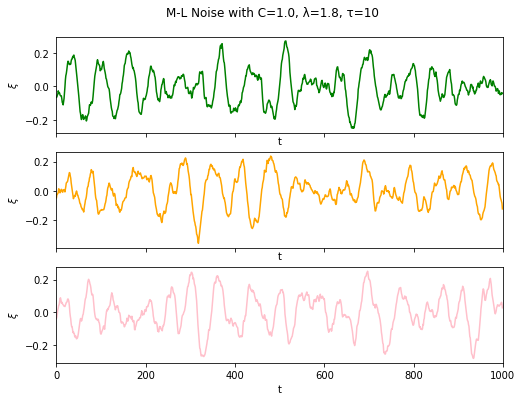

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
colors = ['green', 'orange', 'pink']

for i, noise in enumerate(xi[:3, :]):
    axs[i].plot(range(T), noise, color=colors[i])
    axs[i].set_xlim(0, T)
    axs[i].set_ylabel('$\\xi$')
    axs[i].set_xlabel('t')

fig.suptitle(f'M-L Noise with C={C}, λ={lamda}, τ={tau}', y=0.95)

plt.show()

## Calculating Autocorrelation Functions

Autocorrelation functions (ACF) are crucial for understanding the properties of generated noise sequences. Here we calculate both the actual ACF values from the generated sequences and the theoretical ACF values using GenML's `acf` and `acft` functions, respectively.


In [5]:
# Calculate actual ACF values
acfv = genml.acf(xi, tmax, dt, nc)

Calculating ACF: 100%|██████████████████████████████████████████████████████████████| 201/201 [00:01<00:00, 169.22it/s]


In [6]:
# Calculate theoretical ACF values
acftv = genml.acft(tmax, dt, C, lamda, tau)

### Visualization of ACF Results

Visualizing the autocorrelation functions helps in comparing the actual and theoretical ACF values, providing insights into the accuracy and effectiveness of the GenML library in simulating Mittag-Leffler correlated noise.


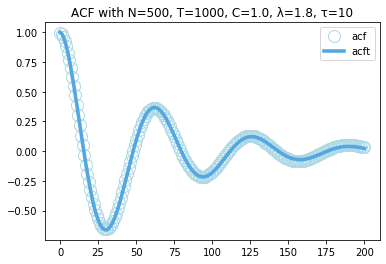

In [7]:
t = list(range(0, tmax + 1, dt))

plt.plot(t, acfv*tau**lamda/C, 'o', label='acf', color='lightblue', markerfacecolor='none', markersize=12)
plt.plot(t, acftv*tau**lamda/C, label='acft', color='#53A8E1', linewidth=3.6)
plt.legend()

plt.title(f'ACF with N={N}, T={T}, C={C}, λ={lamda}, τ={tau}')
plt.show()